<a href="https://colab.research.google.com/github/MartinDC95/Core-s-del-modulo-dos/blob/main/Predicci%C3%B3n_de_Calidad_del_Vino_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

100%|██████████| 21.5k/21.5k [00:00<00:00, 9.66MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1


In [ ]:
import pandas as pd
import kagglehub
import os

# Download latest version
dataset_path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

# List all files in the downloaded dataset directory
files = os.listdir(dataset_path)
print("Files in the dataset directory:", files)

# Construct the correct path to the CSV file
# Replace 'WineQT.csv' with the actual filename if necessary
csv_file = [f for f in files if f.endswith('.csv')][0] #find the file that ends with .csv
file_path = os.path.join(dataset_path, csv_file)

# Load the dataset into a DataFrame called 'df'
df = pd.read_csv(file_path)

# Display the first few rows to inspect the data
df.head()


Files in the dataset directory: ['WineQT.csv']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
# Descripción básica de las variables
df.describe()

# Revisión de las columnas
df.info()

# Distribución de la variable objetivo (calidad del vino)
df['quality'].value_counts().sort_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


,count
quality,
3,6
4,33
5,483
6,462
7,143
8,16


In [ ]:
# Comprobación de valores nulos
df.isnull().sum()

# Para tratar valores nulos, se pueden eliminar o rellenar según sea necesario:
df = df.dropna()  # O reemplazar por la media o mediana si lo prefieres

# Detectar outliers usando IQR (Rango Intercuartílico) para una variable
Q1 = df['alcohol'].quantile(0.25)
Q3 = df['alcohol'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['alcohol'] < (Q1 - 1.5 * IQR)) | (df['alcohol'] > (Q3 + 1.5 * IQR))]

# Ver los outliers detectados
outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
96,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,142
98,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,144
329,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6,467
419,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8,588
462,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5,652
589,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7,821
787,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6,1114
799,7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.99330,3.38,0.88,13.600000,7,1132
868,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7,1228
898,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6,1270


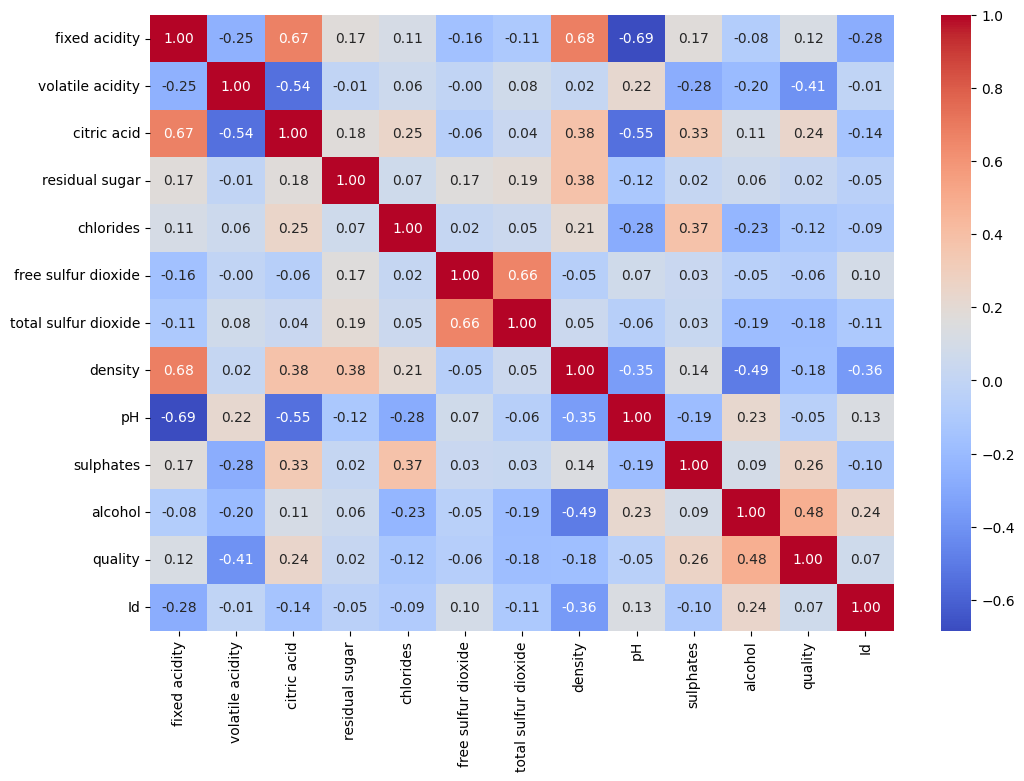

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlación de las características con la calidad
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Variables predictoras y objetivo
X = df.drop('quality', axis=1)
y = df['quality']

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Instanciar los modelos
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=200)

# Entrenar los modelos
knn.fit(X_train_scale, y_train)
rf.fit(X_train_scaled, y_train)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

In [ ]:
from sklearn.model_selection import cross_val_score

# Validación cruzada para evaluar el rendimiento de los modelos
knn_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"KNN Accuracy: {knn_scores.mean()}")
print(f"RandomForest Accuracy: {rf_scores.mean()}")
print(f"LogisticRegression Accuracy: {lr_scores.mean()}")


KNN Accuracy: 0.5338377469525011
RandomForest Accuracy: 0.6607638263375968
LogisticRegression Accuracy: 0.5918693328529393


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

KNN Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.63      0.67      0.65        96
           6       0.55      0.59      0.57        99
           7       0.32      0.23      0.27        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.30      0.30      0.30       229
weighted avg       0.54      0.56      0.55       229

RandomForest Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.64      0.71      0.67        99
           7       0.76      0.62      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.41      0.42       229
weighted avg

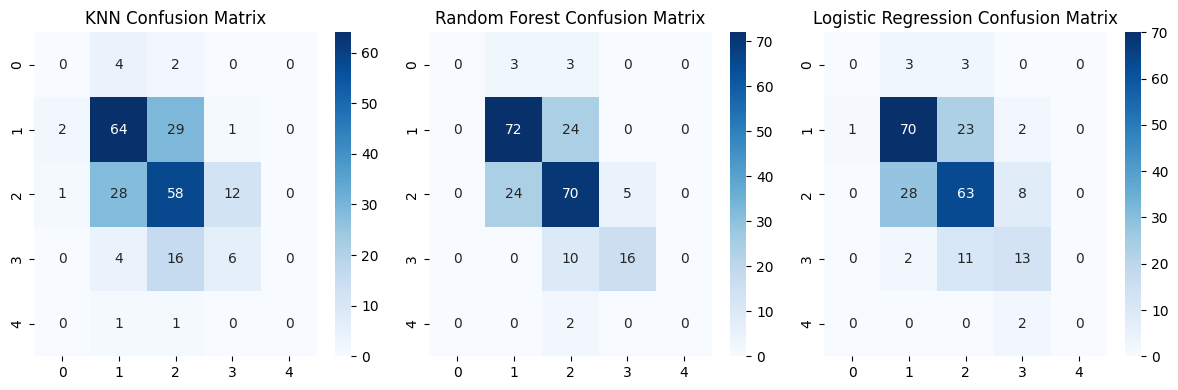

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predicciones
y_pred_knn = knn.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluar el rendimiento de los modelos
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("RandomForest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("LogisticRegression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Matrices de confusión
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues")
plt.title("KNN Confusion Matrix")

plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")

plt.tight_layout()
plt.show()

In [ ]:
!pip install numpy
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test)) # np is now defined
n_classes = y_test_binarized.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(rf) # Using Random Forest as the classifier
y_score = classifier.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])